## Time to get your hands dirty! Supernova distances and redshifts (part 1)

Measuring the cosmological relationship between distance and redshift is at the heart of the entire field of cosmology and allowed, among other things, the discovery of dark energy! At high redshifts, this is done with Type Ia Supernova which are standard (or better, standardizable) candles.

This is a [Nobel prize](https://www.nobelprize.org/prizes/physics/2011/riess/facts/) plot by [Riess et al](https://iopscience.iop.org/article/10.1086/300499)

![Screen%20Shot%202022-05-01%20at%2010.48.48.png](attachment:Screen%20Shot%202022-05-01%20at%2010.48.48.png)

Let's recall the definition of magnitude and the distance modulus (ah! the astronomers...)

$$
\mu = m-M =  5 \log_{10}\left(\frac{d_L}{\rm pc}\right) - 5
$$

Here is the Hubble diagram for Type Ia supernovae (which are standard candels). The lines show the predictions for cosmologies with varying amounts of Ωm and ΩΛ. The observed points all lie above the line for a universe with zero Λ. The lower panel, with the slope caused by the inverse square law taken out, shows the difference between the predictions more clearly and shows why a model with ΩΛ > 0 is favored. 

These are some (synthetic but realistic; see textbook) supernova data

<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
C:\Users\simon\AppData\Local\Temp\ipykernel_9728\371227917.py:8: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu$")


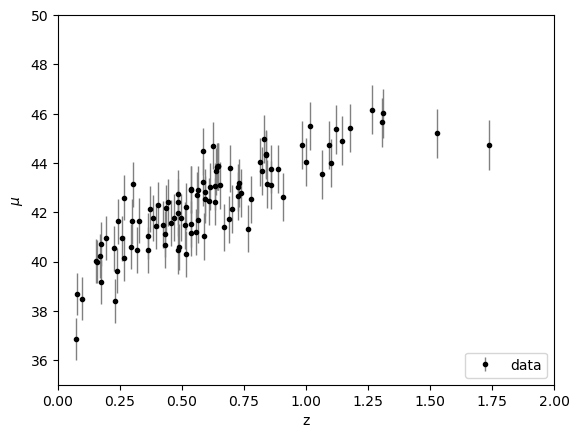

In [3]:
from astroML.datasets import generate_mu_z
import matplotlib.pyplot as plt

z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234) # YOU CANNOT CHANGE THIS

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50);

####  Tasks

- First, explore fitting this data with the tecniques we have seen.
- Start from linear regression and polynomial regression
- For the case of  polynomial regression, just fit many of them for now.
- Let's bet based on intuition! Which fit is the best?
- In what cases are you underfitting the data?
- In what cases are you overfitting the data?
- Now split the data into training and validation sets
- Implement a cross-validation procedure
- Pick the best!
- Does it agree with our bets?

#### OPTIONAL
- Repeat with Basis Function Regression and Kernel Regression
- Explore what happens when you change the number of datapoints and plot the resulting learning curves.

[My exploration](https://github.com/dgerosa/astrostatistics_bicocca_2025/blob/main/solutions/S17_supernovae1.ipynb)

## My work

Repeat

In [35]:
from astroML.datasets import generate_mu_z
import numpy as np
import matplotlib.pyplot as plt
from astroML.linear_model import LinearRegression


<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
C:\Users\simon\AppData\Local\Temp\ipykernel_9728\450522119.py:5: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu$ (distance)")


(100,)
(100,)


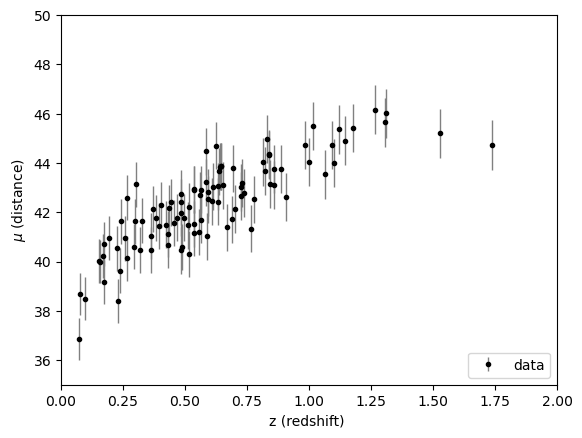

In [36]:
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234) # YOU CANNOT CHANGE THIS

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z (redshift) ")
plt.ylabel("$\mu$ (distance)")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50);

print(z_sample.shape)
print(mu_sample.shape)

#### Fit with astroML.linear_model.LinearRegression

(Oss: I don't use  LinearRegression bc doesn't have eteroschedastic errors)

In [40]:
z_sample = z_sample.reshape(-1, 1)

# Fit con astroML
lin_reg = LinearRegression()
lin_reg.fit(z_sample, mu_sample, y_error=dmu)

# Obtain parameters
theta0 = lin_reg.theta[0]  # intercept
theta1 = lin_reg.theta[1]  # slope
print(f"Coefficients of line (with errors): intercept = {theta0}, slope = {theta1}")

# Grid of values to plot the line
z_line = np.linspace(z_sample.min(), z_sample.max(), 100).reshape(-1, 1)
mu_pred = lin_reg.predict(z_line)

plt.plot(z_line, mu_pred, color='red', label='AstroML Linear Regression')

# Plot
plt.errorbar(z_sample, mu_sample, yerr=dmu, fmt='.k', ecolor='gray', lw=1, label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.xlim(0, 2)
plt.ylim(35, 50)
plt.title("LinearRegression (astroML)")
plt.legend(loc='lower right')
plt.show()


<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
C:\Users\simon\AppData\Local\Temp\ipykernel_9728\2031708286.py:21: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu$")
C:\Users\simon\AppData\Local\Temp\ipykernel_9728\2031708286.py:21: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu$")


AttributeError: 'LinearRegression' object has no attribute 'theta'

Coefficients of line: intercept = 39.56505554722625, slope = [4.64711848]


<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
C:\Users\simon\AppData\Local\Temp\ipykernel_9728\4119745595.py:21: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu$")


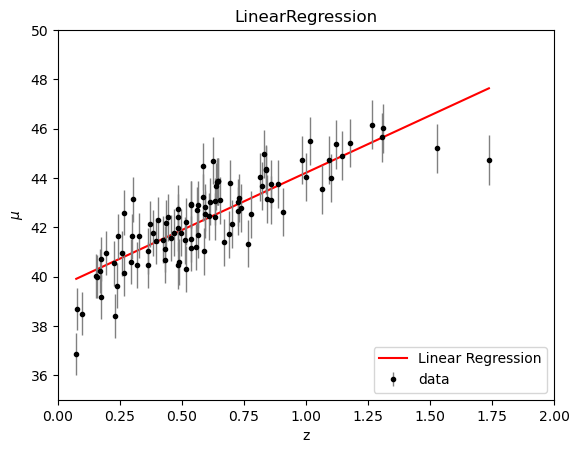

In [ ]:
z_sample = z_sample.reshape(-1, 1)

# Fit
lin_reg = LinearRegression()
lin_reg.fit(z_sample, mu_sample, sample_weight=1.0)

# Obtain coefficients
theta0 = lin_reg.intercept_
theta1 = lin_reg.coef_
print(f"Coefficients of line: intercept = {theta0}, slope = {theta1}")

# Grid of values to plot the line
z_line = np.linspace(z_sample.min(), z_sample.max(), 100).reshape(-1, 1)
mu_pred = lin_reg.predict(z_line)

# Plot
plt.plot(z_line, mu_pred, color='red', label='Linear Regression')

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.xlim(0,2)
plt.ylim(35,50);
plt.title('LinearRegression')
plt.legend(loc='lower right')

# explore [astroML.linear_model.LinearRegression]